###*60009220131 Sayantan Mukherjee D2-2*

In [ ]:
!pip install torch torchvision matplotlib opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Using device: cuda
loading annotations into memory...
Done (t=0.59s)
creating index...
index created!
Found 177 images containing dogs


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 130MB/s]


Epoch 0, Batch 0/71, Loss: 0.9421
Epoch 0, Batch 10/71, Loss: 0.1594
Epoch 0, Batch 20/71, Loss: 0.4079
Epoch 0, Batch 30/71, Loss: 0.1061
Epoch 0, Batch 40/71, Loss: 0.1367
Epoch 0, Batch 50/71, Loss: 0.1206
Epoch 0, Batch 60/71, Loss: 0.3550
Epoch 0, Batch 70/71, Loss: 0.2783
Epoch 1/3, Train Loss: 0.5729
Epoch 1, Batch 0/71, Loss: 0.1974
Epoch 1, Batch 10/71, Loss: 0.2770
Epoch 1, Batch 20/71, Loss: 0.1799
Epoch 1, Batch 30/71, Loss: 0.2449
Epoch 1, Batch 40/71, Loss: 0.1068
Epoch 1, Batch 50/71, Loss: 0.2089
Epoch 1, Batch 60/71, Loss: 0.1965
Epoch 1, Batch 70/71, Loss: 0.1408
Epoch 2/3, Train Loss: 0.2675
Epoch 2, Batch 0/71, Loss: 0.2087
Epoch 2, Batch 10/71, Loss: 0.1952
Epoch 2, Batch 20/71, Loss: 0.1307
Epoch 2, Batch 30/71, Loss: 0.1429
Epoch 2, Batch 40/71, Loss: 0.1469
Epoch 2, Batch 50/71, Loss: 0.1518
Epoch 2, Batch 60/71, Loss: 0.1355
Epoch 2, Batch 70/71, Loss: 0.1429
Epoch 3/3, Train Loss: 0.2087


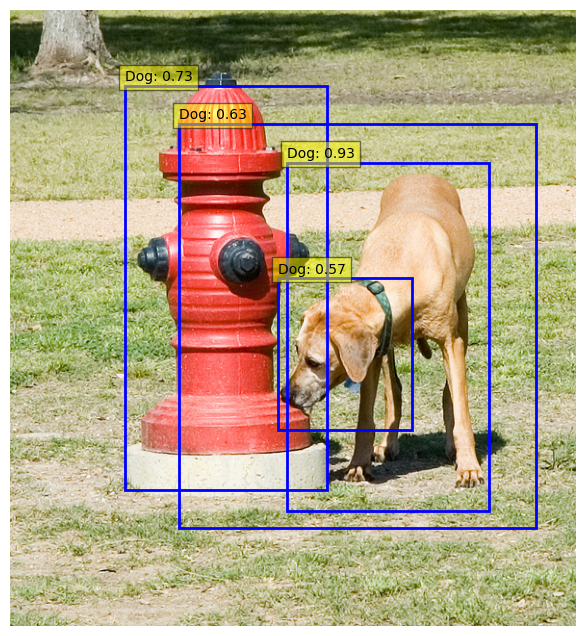

In [ ]:
import os
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
import requests
import zipfile

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Directory to store COCO dataset
DATA_DIR = "./coco_data"
VAL_IMAGES_DIR = os.path.join(DATA_DIR, "val2017")
VAL_ANNOT_FILE = os.path.join(DATA_DIR, "annotations/instances_val2017.json")

# Download COCO validation dataset if not present
def download_coco_val():
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)

    # Download validation images
    if not os.path.exists(VAL_IMAGES_DIR):
        print("Downloading COCO val2017 images...")
        url = "http://images.cocodataset.org/zips/val2017.zip"
        r = requests.get(url, stream=True)
        with open(os.path.join(DATA_DIR, "val2017.zip"), "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
        with zipfile.ZipFile(os.path.join(DATA_DIR, "val2017.zip"), 'r') as zip_ref:
            zip_ref.extractall(DATA_DIR)
        os.remove(os.path.join(DATA_DIR, "val2017.zip"))

    # Download annotations
    if not os.path.exists(VAL_ANNOT_FILE):
        print("Downloading COCO val2017 annotations...")
        url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
        r = requests.get(url, stream=True)
        with open(os.path.join(DATA_DIR, "annotations.zip"), "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
        with zipfile.ZipFile(os.path.join(DATA_DIR, "annotations.zip"), 'r') as zip_ref:
            zip_ref.extractall(DATA_DIR)
        os.remove(os.path.join(DATA_DIR, "annotations.zip"))

# Custom Dataset for COCO dogs
class CocoDogDataset(Dataset):
    def __init__(self, root, ann_file, transform=None):
        self.root = root
        self.coco = COCO(ann_file)
        self.dog_ids = self.coco.getCatIds(catNms=['dog'])  # Filter for dogs
        self.img_ids = self.coco.getImgIds(catIds=self.dog_ids)
        self.transform = transform
        print(f"Found {len(self.img_ids)} images containing dogs")

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = os.path.join(self.root, img_info['file_name'])
        image = Image.open(img_path).convert('RGB')

        ann_ids = self.coco.getAnnIds(imgIds=img_id, catIds=self.dog_ids, iscrowd=False)
        anns = self.coco.loadAnns(ann_ids)

        boxes = []
        labels = []
        for ann in anns:
            x, y, w, h = ann['bbox']
            xmin, ymin, xmax, ymax = x, y, x + w, y + h
            if w > 0 and h > 0:  # Valid boxes only
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(1)  # 1 for dog, 0 will be background

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([img_id]),
            "area": (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
            "iscrowd": torch.zeros((len(boxes),), dtype=torch.int64)
        }

        if self.transform:
            image = self.transform(image)

        return image, target

    def __len__(self):
        return len(self.img_ids)

# Define model
def get_model(num_classes=2):  # 2 classes: background (0) and dog (1)
    model = fasterrcnn_resnet50_fpn(weights="FasterRCNN_ResNet50_FPN_Weights.DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# Transforms
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Download dataset
download_coco_val()

# Load dataset
dataset = CocoDogDataset(root=VAL_IMAGES_DIR, ann_file=VAL_ANNOT_FILE, transform=transform)

# Split into train and validation (80-20 split for demo)
indices = torch.randperm(len(dataset)).tolist()
train_dataset = torch.utils.data.Subset(dataset, indices[:-int(0.2 * len(dataset))])
val_dataset = torch.utils.data.Subset(dataset, indices[-int(0.2 * len(dataset)):])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2,
                          collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2,
                        collate_fn=lambda x: tuple(zip(*x)))

# Initialize model
model = get_model(num_classes=2)
model.to(device)

# Optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training function
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    total_loss = 0
    for i, (images, targets) in enumerate(data_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
        if i % 10 == 0:
            print(f"Epoch {epoch}, Batch {i}/{len(data_loader)}, Loss: {losses.item():.4f}")

    return total_loss / len(data_loader)

# Training loop
num_epochs = 3  # Small number for demo; increase for better results
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, optimizer, train_loader, device, epoch)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")

# Save model
torch.save(model.state_dict(), "faster_rcnn_dog_detector.pth")

# Inference function
def detect_dogs(model, image_path, threshold=0.5):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image_tensor)[0]

    boxes = prediction['boxes'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()

    keep = scores >= threshold
    return boxes[keep], scores[keep], labels[keep]

# Visualization function
def visualize_predictions(image_path, boxes, scores, labels):
    image = np.array(Image.open(image_path).convert("RGB"))
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box, score, label in zip(boxes, scores, labels):
        if label == 1:  # Only show dogs
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='blue', linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"Dog: {score:.2f}", bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Test inference on a sample image
sample_idx = indices[0]  # Use first image from dataset
sample_img_info = dataset.coco.loadImgs(dataset.img_ids[sample_idx])[0]
sample_img_path = os.path.join(VAL_IMAGES_DIR, sample_img_info['file_name'])
boxes, scores, labels = detect_dogs(model, sample_img_path)
visualize_predictions(sample_img_path, boxes, scores, labels)

Testing on custom image: ./coco_data/val2017/000000291664.jpg


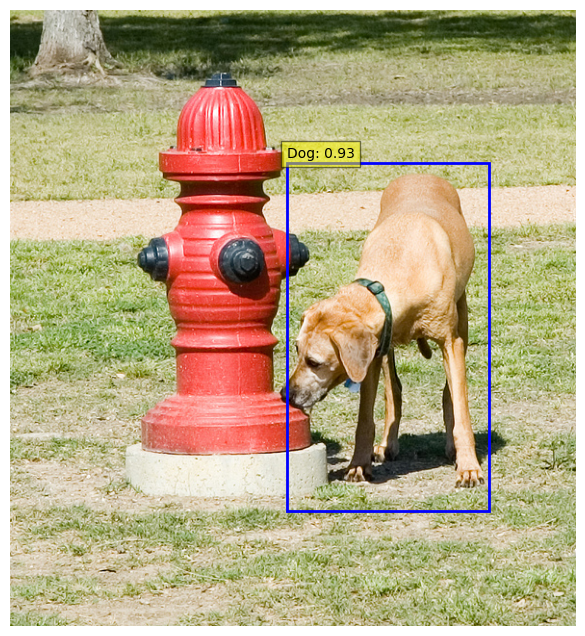

In [ ]:
sample_idx = indices[0]  # Use first image from dataset
sample_img_info = dataset.coco.loadImgs(dataset.img_ids[sample_idx])[0]
custom_image_path = os.path.join(VAL_IMAGES_DIR, sample_img_info['file_name'])
if 'model' in globals() and 'device' in globals():
    if os.path.exists(custom_image_path):
        print(f"Testing on custom image: {custom_image_path}")
        boxes, scores, labels = detect_dogs(model, custom_image_path,threshold=0.79
                                      )
        visualize_predictions(custom_image_path, boxes, scores, labels)
    else:
        print(f"Image not found at {custom_image_path}. Please update the path.")
else:
    print("Model or device not defined. Ensure training cell ran successfully.")

Testing on custom image: /content/dog.jpg


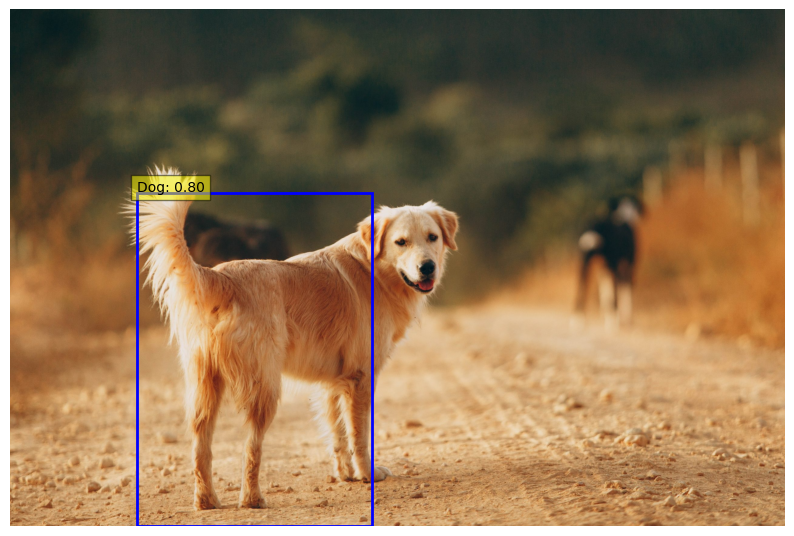

In [ ]:
custom_image_path = "/content/dog.jpg"
if 'model' in globals() and 'device' in globals():
    if os.path.exists(custom_image_path):
        print(f"Testing on custom image: {custom_image_path}")
        boxes, scores, labels = detect_dogs(model, custom_image_path,threshold=0.79
                                      )
        visualize_predictions(custom_image_path, boxes, scores, labels)
    else:
        print(f"Image not found at {custom_image_path}. Please update the path.")
else:
    print("Model or device not defined. Ensure training cell ran successfully.")

Testing on custom image: /content/images.jpg


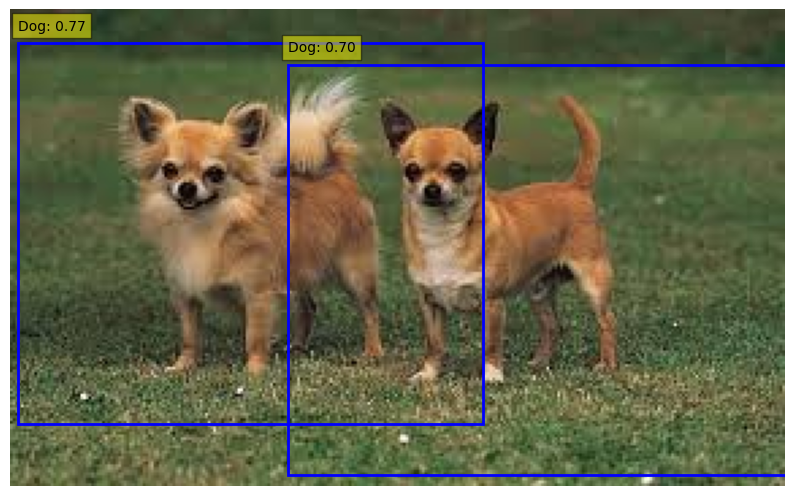

In [ ]:
import torch

# Function to calculate IoU between two bounding boxes
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.
    Args:
        box1: [xmin, ymin, xmax, ymax]
        box2: [xmin, ymin, xmax, ymax]
    Returns:
        iou: float value representing IoU
    """
    # Determine the coordinates of the intersection rectangle
    xmin_inter = max(box1[0], box2[0])
    ymin_inter = max(box1[1], box2[1])
    xmax_inter = min(box1[2], box2[2])
    ymax_inter = min(box1[3], box2[3])

    # Compute the area of the intersection rectangle
    inter_width = max(0, xmax_inter - xmin_inter)
    inter_height = max(0, ymax_inter - ymin_inter)
    inter_area = inter_width * inter_height

    # Compute the area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute the union area
    union_area = box1_area + box2_area - inter_area

    # Compute IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Function to perform Non-Maximum Suppression (NMS)
def non_max_suppression(boxes, scores, iou_threshold=0.5):
    """
    Perform Non-Maximum Suppression (NMS) to eliminate redundant bounding boxes.
    Args:
        boxes: List of bounding boxes [xmin, ymin, xmax, ymax]
        scores: Confidence scores for each bounding box
        iou_threshold: IoU threshold for suppression
    Returns:
        keep_boxes: Indices of boxes to keep
    """
    # Sort boxes by confidence scores in descending order
    sorted_indices = torch.argsort(scores, descending=True)

    keep_boxes = []
    while len(sorted_indices) > 0:
        # Pick the box with the highest score
        current_index = sorted_indices[0]
        keep_boxes.append(current_index)

        # Compute IoU of the current box with all remaining boxes
        current_box = boxes[current_index]
        remaining_indices = sorted_indices[1:]
        remaining_boxes = boxes[remaining_indices]

        ious = torch.tensor([calculate_iou(current_box, box) for box in remaining_boxes])

        # Filter out boxes with IoU greater than the threshold
        filtered_indices = remaining_indices[ious <= iou_threshold]
        sorted_indices = filtered_indices

    return torch.tensor(keep_boxes)

# Modified detect_dogs function with NMS
def detect_dogs_with_nms(model, image_path, threshold=0.5, iou_threshold=0.5):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image_tensor)[0]

    boxes = prediction['boxes'].cpu()
    scores = prediction['scores'].cpu()
    labels = prediction['labels'].cpu()

    # Apply score thresholding
    keep = scores >= threshold
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]

    # Apply Non-Maximum Suppression
    keep_indices = non_max_suppression(boxes, scores, iou_threshold=iou_threshold)
    boxes = boxes[keep_indices]
    scores = scores[keep_indices]
    labels = labels[keep_indices]

    return boxes.numpy(), scores.numpy(), labels.numpy()

# Test inference on a custom image with NMS
custom_image_path = "/content/images.jpg"
if 'model' in globals() and 'device' in globals():
    if os.path.exists(custom_image_path):
        print(f"Testing on custom image: {custom_image_path}")
        boxes, scores, labels = detect_dogs_with_nms(model, custom_image_path, threshold=0.69, iou_threshold=0.5)
        visualize_predictions(custom_image_path, boxes, scores, labels)
    else:
        print(f"Image not found at {custom_image_path}. Please update the path.")
else:
    print("Model or device not defined. Ensure training cell ran successfully.")

Using device: cuda
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
Found 177 images containing dogs in val2017
Epoch 1/5


<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)
<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)


Epoch 0, Batch 0/71, Loss: 2.9850
Epoch 0, Batch 10/71, Loss: 0.9460
Epoch 0, Batch 20/71, Loss: 0.7835
Epoch 0, Batch 30/71, Loss: 0.6826
Epoch 0, Batch 40/71, Loss: 0.6771
Epoch 0, Batch 50/71, Loss: 0.7035
Epoch 0, Batch 60/71, Loss: 0.6507
Epoch 0, Batch 70/71, Loss: 1.0437
Train Loss: 0.8876
Epoch 2/5


<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)
<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)


Epoch 1, Batch 0/71, Loss: 0.9024
Epoch 1, Batch 10/71, Loss: 0.6127
Epoch 1, Batch 20/71, Loss: 0.7237
Epoch 1, Batch 30/71, Loss: 0.5453
Epoch 1, Batch 40/71, Loss: 0.4490
Epoch 1, Batch 50/71, Loss: 0.4480
Epoch 1, Batch 60/71, Loss: 0.7679
Epoch 1, Batch 70/71, Loss: 0.7456
Train Loss: 0.5764
Epoch 3/5


<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)
<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)


Epoch 2, Batch 0/71, Loss: 0.3989
Epoch 2, Batch 10/71, Loss: 0.3195
Epoch 2, Batch 20/71, Loss: 0.2381
Epoch 2, Batch 30/71, Loss: 0.2434
Epoch 2, Batch 40/71, Loss: 0.2522
Epoch 2, Batch 50/71, Loss: 0.2974
Epoch 2, Batch 60/71, Loss: 0.3842
Epoch 2, Batch 70/71, Loss: 0.2332
Train Loss: 0.4154
Epoch 4/5


<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)
<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)


Epoch 3, Batch 0/71, Loss: 0.2675
Epoch 3, Batch 10/71, Loss: 0.3106
Epoch 3, Batch 20/71, Loss: 0.2653
Epoch 3, Batch 30/71, Loss: 0.3618
Epoch 3, Batch 40/71, Loss: 0.2264
Epoch 3, Batch 50/71, Loss: 0.3322
Epoch 3, Batch 60/71, Loss: 0.2158
Epoch 3, Batch 70/71, Loss: 0.3227
Train Loss: 0.3201
Epoch 5/5


<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)
<ipython-input-24-c623a7c78ad3>:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  masks = torch.as_tensor(masks, dtype=torch.uint8)


Epoch 4, Batch 0/71, Loss: 0.2333
Epoch 4, Batch 10/71, Loss: 0.2733
Epoch 4, Batch 20/71, Loss: 0.3146
Epoch 4, Batch 30/71, Loss: 0.2361
Epoch 4, Batch 40/71, Loss: 0.2678
Epoch 4, Batch 50/71, Loss: 0.5119
Epoch 4, Batch 60/71, Loss: 0.5108
Epoch 4, Batch 70/71, Loss: 0.2721
Train Loss: 0.2633
Model saved to mask_rcnn_dog_detector_val2017.pth
Testing on custom image: /content/dog2.jpg with confidence=0.5, IoU=0.5
Raw detections: 6 boxes
Detection 0: Label=1, Score=0.9663, Box=[  1.3777804  29.238201  182.00119   192.3822   ]
Detection 1: Label=1, Score=0.5726, Box=[ 92.455765  34.498875 182.55852  186.64116 ]
Detection 2: Label=1, Score=0.2276, Box=[ 12.237402  23.31831   98.07024  193.09221 ]
Detection 3: Label=1, Score=0.0817, Box=[ 89.23637  60.12457 188.67984 137.72473]
Detection 4: Label=1, Score=0.0647, Box=[ 15.75879  84.37039 130.09483 194.     ]
Detection 5: Label=1, Score=0.0541, Box=[ 62.480354  60.45074  220.8122   181.01324 ]
Filtered detections (score >= 0.5): 2 boxes


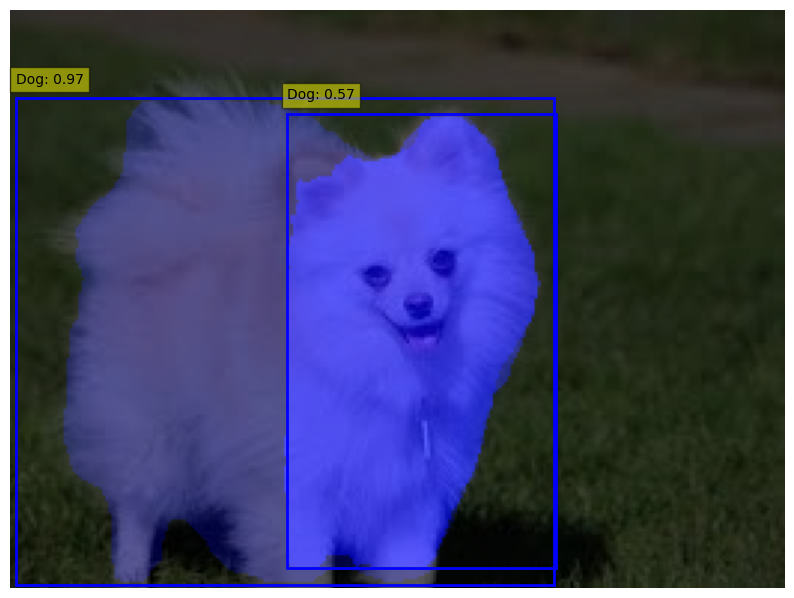

In [ ]:
import os
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import torchvision.transforms as T

%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

DATA_DIR = "./coco_data"
VAL_IMAGES_DIR = os.path.join(DATA_DIR, "val2017")
VAL_ANNOT_FILE = os.path.join(DATA_DIR, "annotations/instances_val2017.json")

def download_coco_val():
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)

    # Download validation images (~1GB)
    if not os.path.exists(VAL_IMAGES_DIR):
        print("Downloading COCO val2017 images...")
        url = "http://images.cocodataset.org/zips/val2017.zip"
        r = requests.get(url, stream=True)
        with open(os.path.join(DATA_DIR, "val2017.zip"), "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
        with zipfile.ZipFile(os.path.join(DATA_DIR, "val2017.zip"), 'r') as zip_ref:
            zip_ref.extractall(DATA_DIR)
        os.remove(os.path.join(DATA_DIR, "val2017.zip"))

    # Download annotations (~241MB)
    if not os.path.exists(VAL_ANNOT_FILE):
        print("Downloading COCO val2017 annotations...")
        url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
        r = requests.get(url, stream=True)
        with open(os.path.join(DATA_DIR, "annotations.zip"), "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
        with zipfile.ZipFile(os.path.join(DATA_DIR, "annotations.zip"), 'r') as zip_ref:
            zip_ref.extractall(DATA_DIR)
        os.remove(os.path.join(DATA_DIR, "annotations.zip"))

# Download only val2017
download_coco_val()

#Custom Dataset for COCO Dogs (Val2017 Only)
class CocoDogDataset(Dataset):
    def __init__(self, root, ann_file, transform=None):
        self.root = root
        self.coco = COCO(ann_file)
        self.dog_ids = self.coco.getCatIds(catNms=['dog'])  # Filter for dogs
        self.img_ids = self.coco.getImgIds(catIds=self.dog_ids)
        self.transform = transform
        print(f"Found {len(self.img_ids)} images containing dogs in val2017")

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = os.path.join(self.root, img_info['file_name'])
        image = Image.open(img_path).convert('RGB')

        ann_ids = self.coco.getAnnIds(imgIds=img_id, catIds=self.dog_ids, iscrowd=False)
        anns = self.coco.loadAnns(ann_ids)

        boxes = []
        labels = []
        masks = []
        for ann in anns:
            x, y, w, h = ann['bbox']
            xmin, ymin, xmax, ymax = x, y, x + w, y + h
            if w > 0 and h > 0:
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(1)  # 1 for dog (0 will be background)
                masks.append(self.coco.annToMask(ann))

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        target = {
            "boxes": boxes,
            "labels": labels,
            "masks": masks,
            "image_id": torch.tensor([img_id]),
            "area": (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
            "iscrowd": torch.zeros((len(boxes),), dtype=torch.int64)
        }

        if self.transform:
            image = self.transform(image)

        return image, target

    def __len__(self):
        return len(self.img_ids)

#Load Datasets and Data Loaders (Val2017 Only)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Use val2017 for both training and validation (small dataset for demo)
dataset = CocoDogDataset(root=VAL_IMAGES_DIR, ann_file=VAL_ANNOT_FILE, transform=transform)

# Split into train and validation (80-20 split)
indices = torch.randperm(len(dataset)).tolist()
train_size = int(0.8 * len(dataset))
train_dataset = torch.utils.data.Subset(dataset, indices[:train_size])
val_dataset = torch.utils.data.Subset(dataset, indices[train_size:])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2,
                          collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2,
                        collate_fn=lambda x: tuple(zip(*x)))

#Define and Initialize Model
def get_model(num_classes=2):
    model = maskrcnn_resnet50_fpn(weights="MaskRCNN_ResNet50_FPN_Weights.DEFAULT")

    # Replace box predictor
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Replace mask predictor
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

    return model

model = get_model(num_classes=2)
model.to(device)

#Training Function
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)

def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    total_loss = 0
    for i, (images, targets) in enumerate(data_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
        if i % 10 == 0:
            print(f"Epoch {epoch}, Batch {i}/{len(data_loader)}, Loss: {losses.item():.4f}")

    return total_loss / len(data_loader)

num_epochs = 5  # Reduced epochs for faster training on val2017
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_loss = train_one_epoch(model, optimizer, train_loader, device, epoch)
    print(f"Train Loss: {train_loss:.4f}")

# Save the model
model_save_path = "mask_rcnn_dog_detector_val2017.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

#Inference and Visualization Functions
def detect_dogs(model, image_path, confidence_threshold=0.5, iou_threshold=0.5):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image_tensor)[0]

    boxes = prediction['boxes'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    masks = prediction['masks'].cpu().numpy()

    print(f"Raw detections: {len(boxes)} boxes")
    for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
        print(f"Detection {i}: Label={label}, Score={score:.4f}, Box={box}")

    keep = scores >= confidence_threshold
    boxes, scores, labels, masks = boxes[keep], scores[keep], labels[keep], masks[keep]
    print(f"Filtered detections (score >= {confidence_threshold}): {len(boxes)} boxes")

    if len(boxes) > 0:
        boxes_torch = torch.as_tensor(boxes, dtype=torch.float32)
        scores_torch = torch.as_tensor(scores, dtype=torch.float32)
        keep_indices = torchvision.ops.nms(boxes_torch, scores_torch, iou_threshold=iou_threshold)
        boxes = boxes[keep_indices]
        scores = scores[keep_indices]
        labels = labels[keep_indices]
        masks = masks[keep_indices]
        print(f"After NMS (IoU threshold {iou_threshold}): {len(boxes)} boxes retained")

    return boxes, scores, labels, masks, image

def visualize_predictions(image, boxes, scores, labels, masks):
    image_np = np.array(image)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_np)
    ax = plt.gca()

    for box, score, label, mask in zip(boxes, scores, labels, masks):
        if label == 1:  # 1 is "dog" from our fine-tuning
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='blue', linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"Dog: {score:.2f}", bbox=dict(facecolor='yellow', alpha=0.5))

            mask = mask[0] > 0.5  # Threshold mask
            mask_rgb = np.zeros_like(image_np)
            mask_rgb[mask] = [0, 0, 255]  # Blue for dog mask
            mask_alpha = 0.4  # Transparency
            plt.imshow(mask_rgb, alpha=mask_alpha)

            print(f"Drawing box and mask: Label={label}, Score={score:.4f}, Box={box}")

    plt.axis('off')
    plt.show()

# Test Custom Image
custom_image_path = "/content/dog2.jpg"
confidence_threshold = 0.  # Adjust for more/less detections
iou_threshold = 0.5  # Adjust for NMS

if os.path.exists(custom_image_path):
    print(f"Testing on custom image: {custom_image_path} with confidence={confidence_threshold}, IoU={iou_threshold}")
    boxes, scores, labels, masks, image = detect_dogs(model, custom_image_path,
                                                      confidence_threshold, iou_threshold)
    visualize_predictions(image, boxes, scores, labels, masks)
else:
    print(f"Image not found at {custom_image_path}. Please update the path.")

Testing on custom image: /content/dog3.jpg with confidence=0.5, IoU=0.5
Raw detections: 6 boxes
Detection 0: Label=1, Score=0.9870, Box=[135.58992   45.565926 197.32353  154.02168 ]
Detection 1: Label=1, Score=0.9808, Box=[ 73.570595  54.095016 139.02592  163.11234 ]
Detection 2: Label=1, Score=0.7015, Box=[ 50.159687  49.167465 177.05223  158.87268 ]
Detection 3: Label=1, Score=0.4031, Box=[ 83.51003   40.488426 220.8339   168.2537  ]
Detection 4: Label=1, Score=0.1360, Box=[ 67.53432   48.616257 130.54285  116.09346 ]
Detection 5: Label=1, Score=0.0677, Box=[139.77858   49.155396 188.89328   79.72088 ]
Filtered detections (score >= 0.5): 3 boxes
After NMS (IoU threshold 0.5): 3 boxes retained
Drawing box and mask: Label=1, Score=0.9870, Box=[135.58992   45.565926 197.32353  154.02168 ]
Drawing box and mask: Label=1, Score=0.9808, Box=[ 73.570595  54.095016 139.02592  163.11234 ]
Drawing box and mask: Label=1, Score=0.7015, Box=[ 50.159687  49.167465 177.05223  158.87268 ]


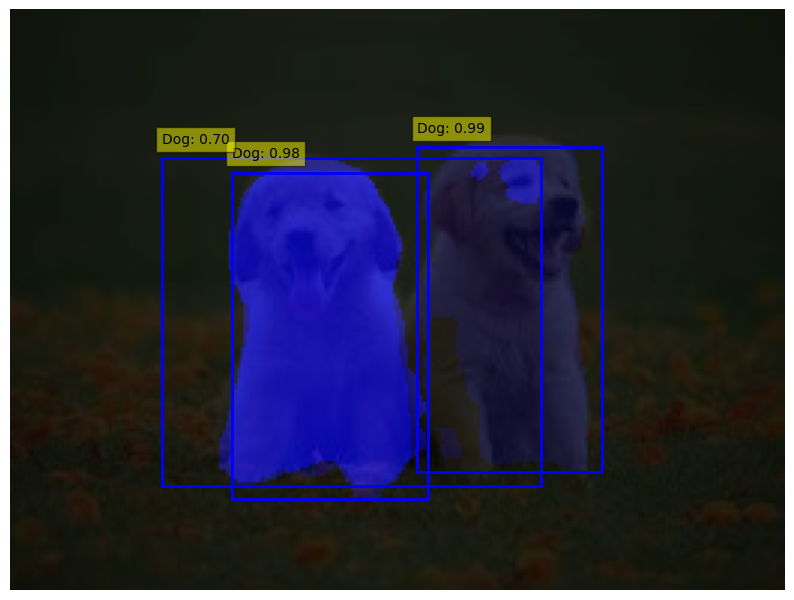

In [ ]:
custom_image_path = "/content/dog3.jpg"
confidence_threshold = 0.5  # Adjust for more/less detections
iou_threshold = 0.5  # Adjust for NMS

if os.path.exists(custom_image_path):
    print(f"Testing on custom image: {custom_image_path} with confidence={confidence_threshold}, IoU={iou_threshold}")
    boxes, scores, labels, masks, image = detect_dogs(model, custom_image_path,
                                                      confidence_threshold, iou_threshold)
    visualize_predictions(image, boxes, scores, labels, masks)
else:
    print(f"Image not found at {custom_image_path}. Please update the path.")

###*Advantages of Faster R-CNN and Mask R-CNN*
#Faster R-CNN
Speed : Faster R-CNN eliminates the need for selective search by introducing the Region Proposal Network (RPN), making it significantly faster than its predecessors.

Accuracy : It achieves high accuracy in object detection tasks by combining region proposals with classification and bounding box regression.

Scalability : The model can handle large datasets and multiple object classes effectively.

#Mask R-CNN

Pixel-Level Accuracy : Mask R-CNN extends Faster R-CNN by adding a branch for pixel-level segmentation, enabling precise object instance segmentation.

Multi-Scale Detection : The Feature Pyramid Network (FPN) enhances feature extraction for objects at different scales.

Versatility : It is widely used in applications like autonomous driving, medical imaging, and robotics where both detection and segmentation are critical.